In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [33]:
df = pd.read_csv('/Users/shreeyadaga/Documents/college/Sem6/DSBDA/DSBDALExam DataSets/DSBDALExam DataSets/breast-cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [34]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [35]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [36]:
df.dropna(axis=0, how='any', inplace=True)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [37]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [38]:
numeric_cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
for col in numeric_cols:
    # Check if there are *any* negative values in that column
    if (df[col] < 0).any():
        # If so, keep only the rows where that column is >= 0
        df = df[df[col] >= 0]
print("After removing negatives:", df.shape)

After removing negatives: (569, 32)


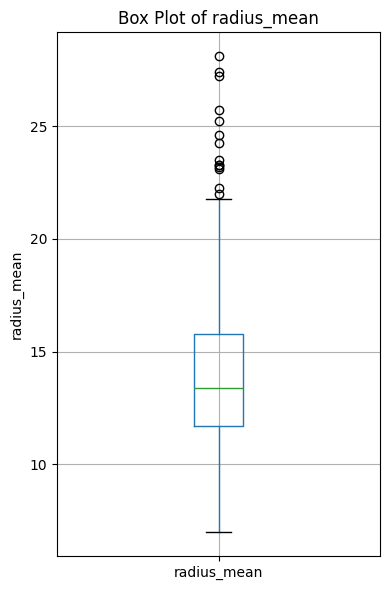

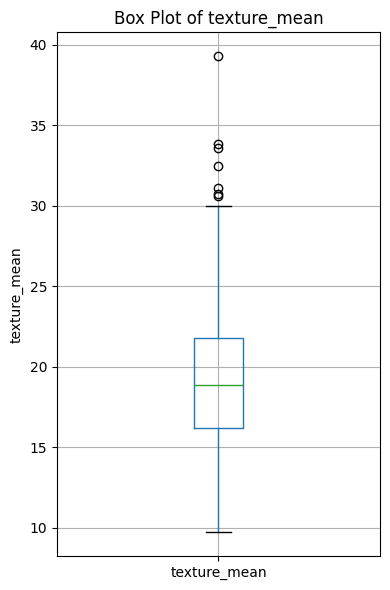

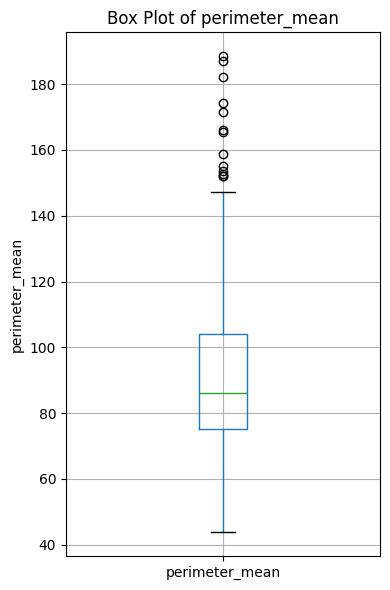

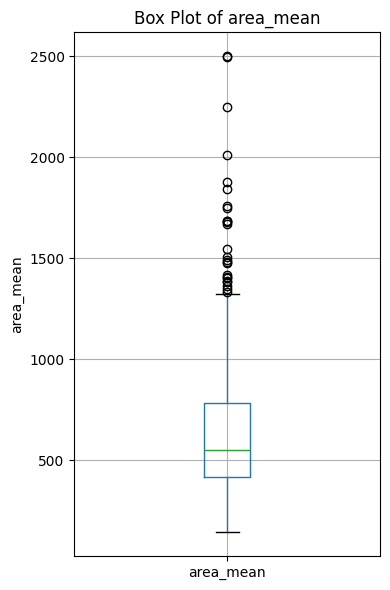

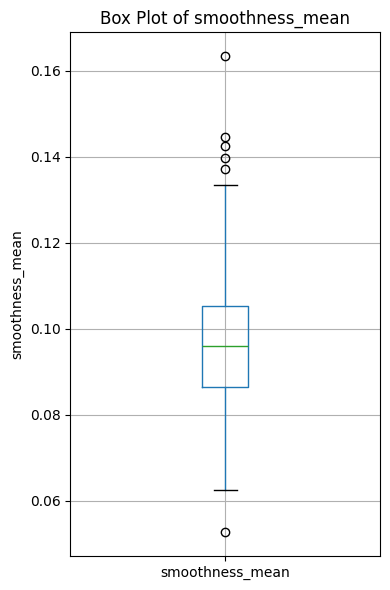

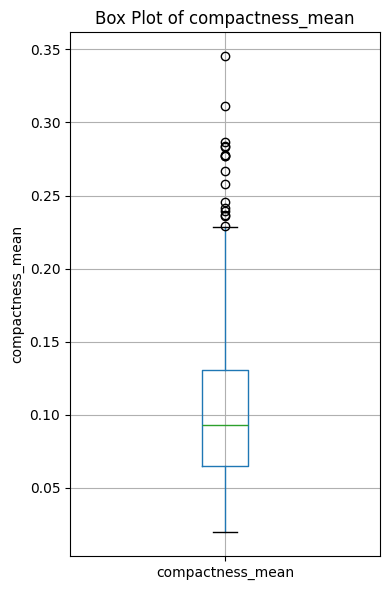

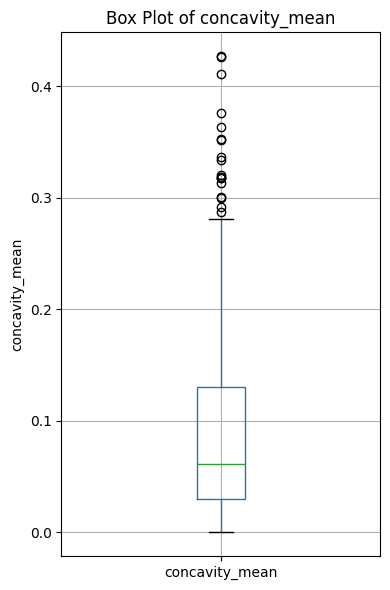

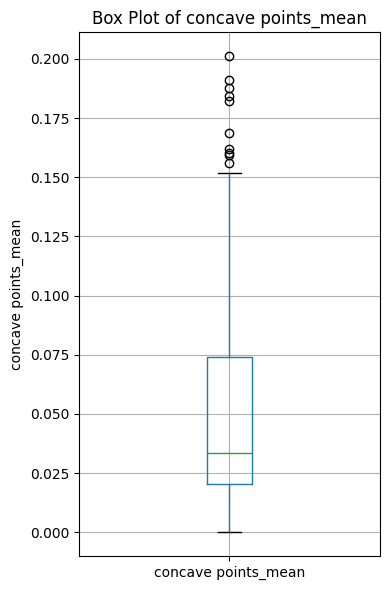

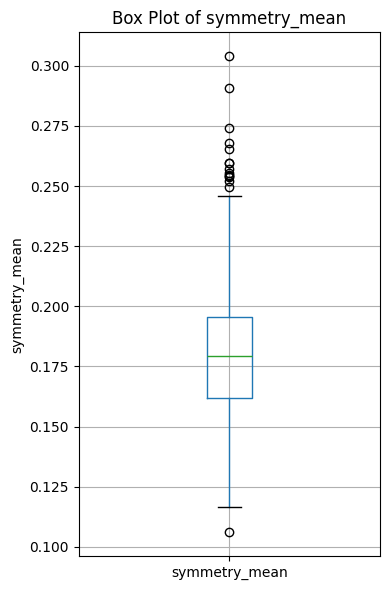

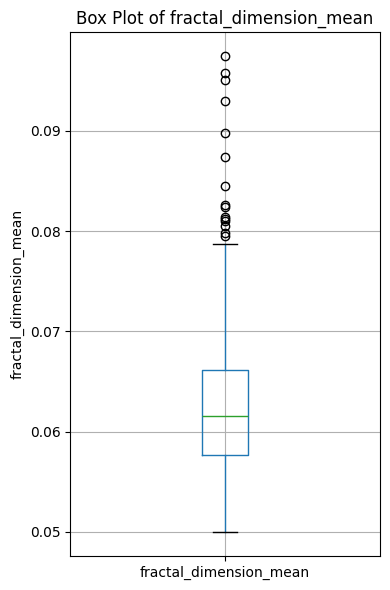

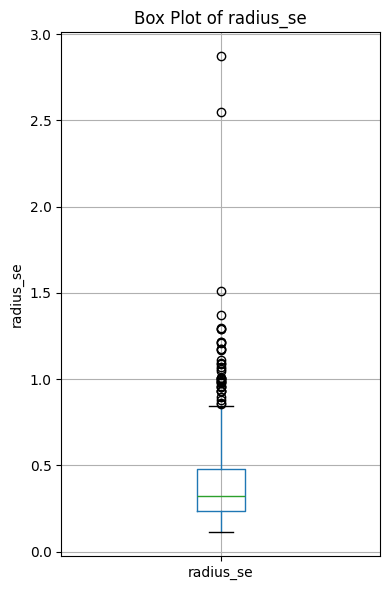

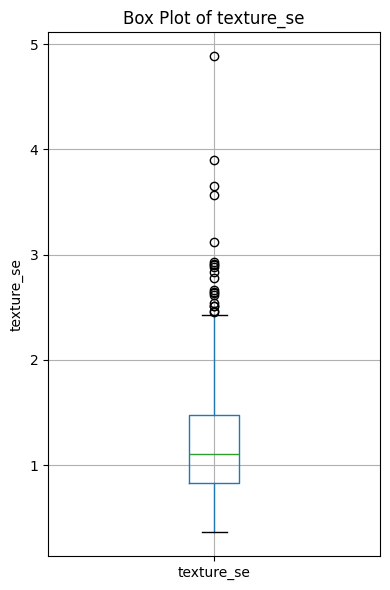

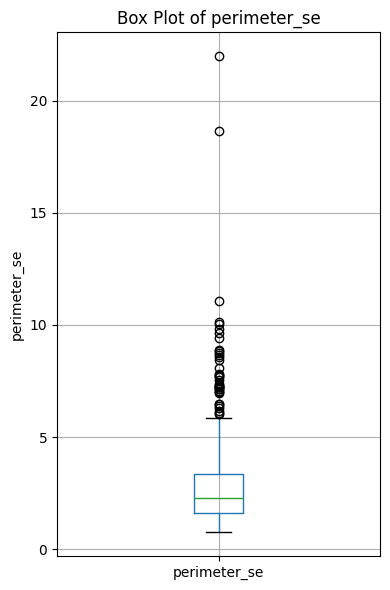

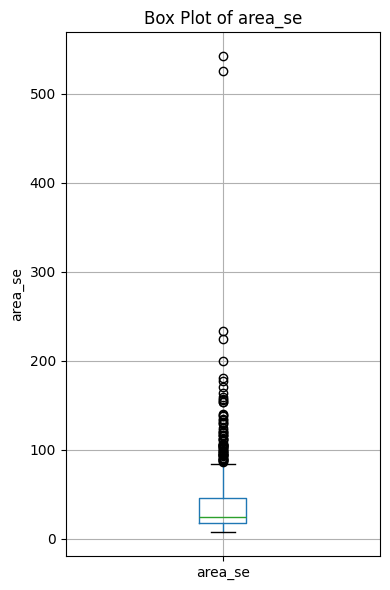

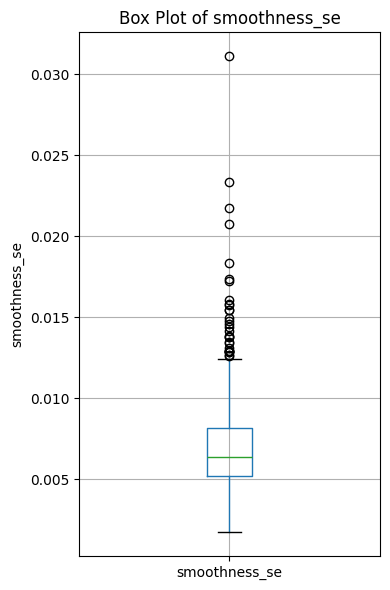

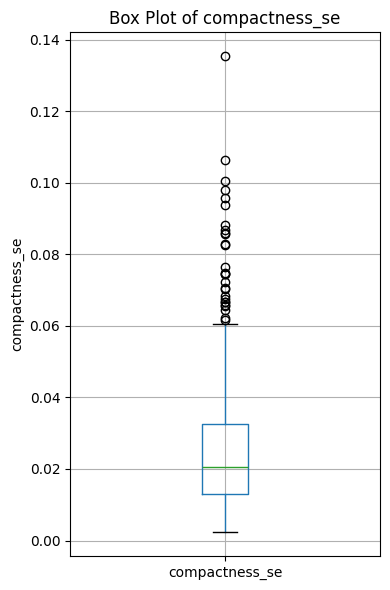

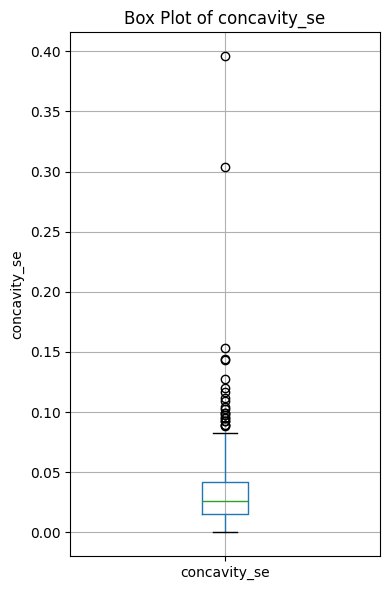

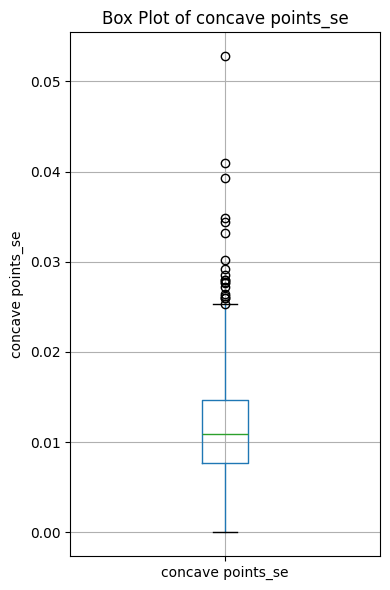

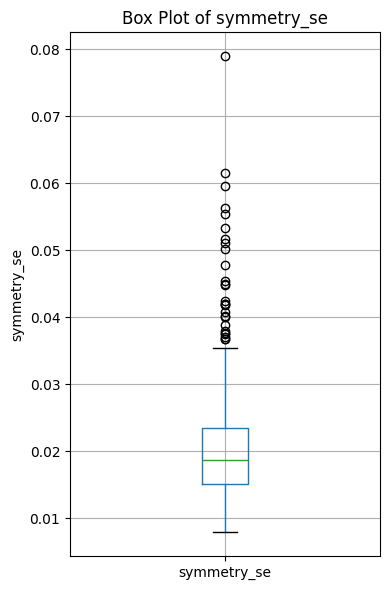

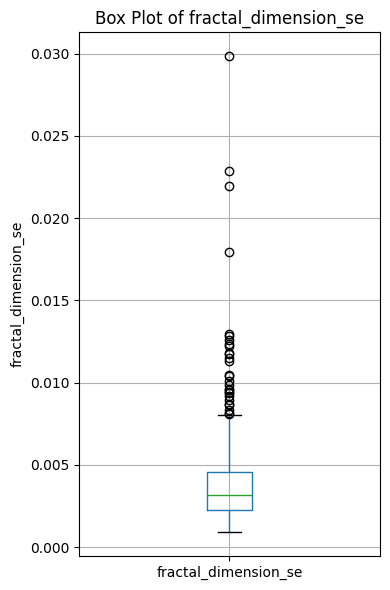

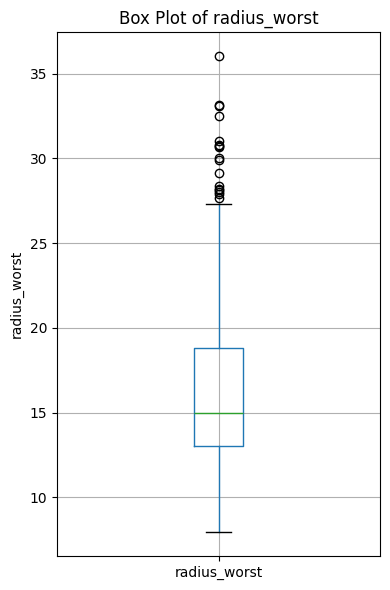

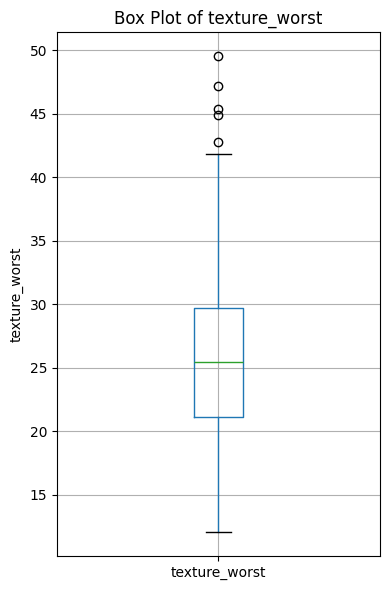

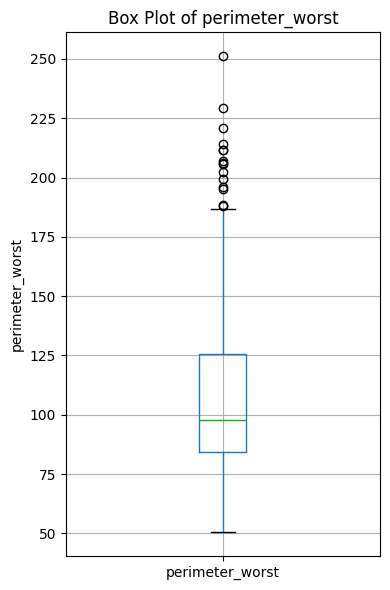

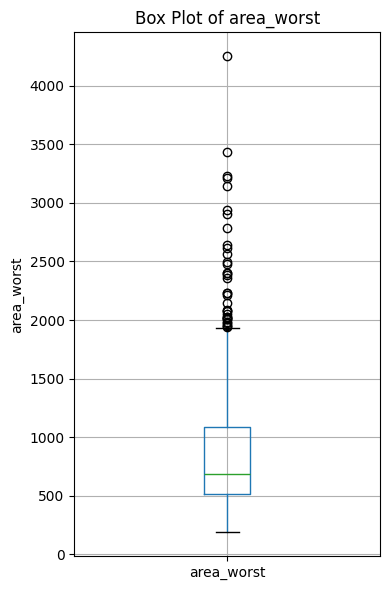

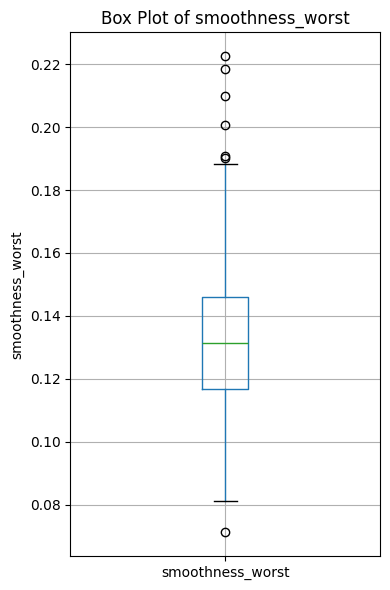

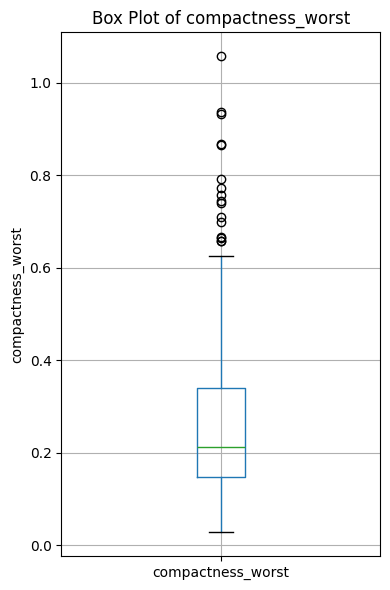

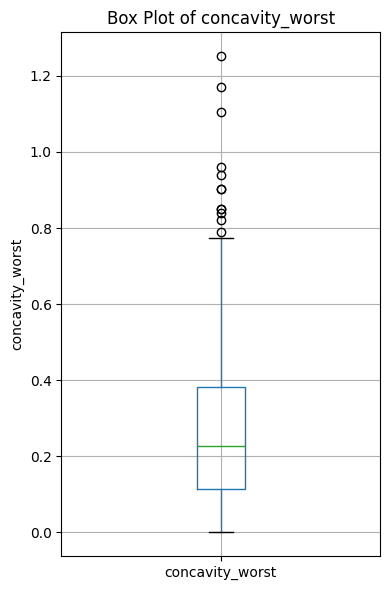

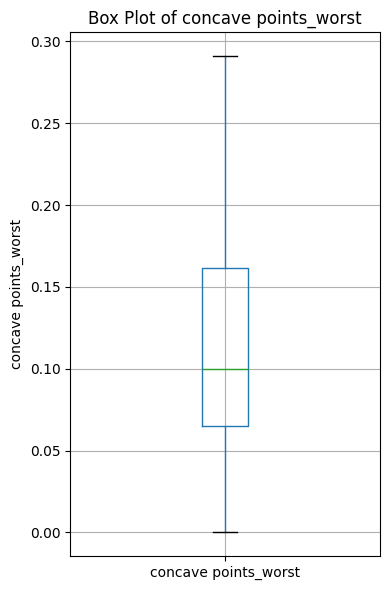

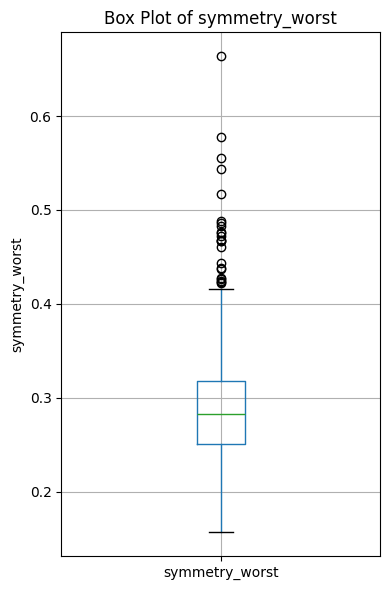

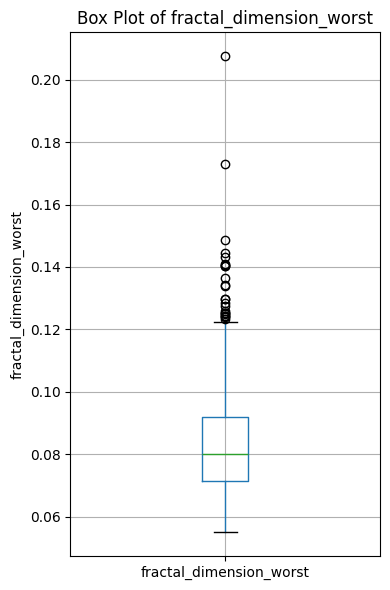

In [39]:
for col in numeric_cols:
    plt.figure(figsize=(4, 6))
    # Method A: using DataFrame.boxplot
    df.boxplot(column=col)
    #plt.boxplot(df[col], labels=[col])
    plt.title(f"Box Plot of {col}")
    plt.ylabel(col)
    plt.tight_layout()  # adjusts subplot parameters (marhins, paddings) so that axes labels, titles and tick labels don't overlap
    plt.show()

In [40]:
# Outlier Removal using IQR method
def remove_outliers_iqr(df, cols, factor=1.5):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower, upper = Q1 - factor * IQR, Q3 + factor * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

df = remove_outliers_iqr(df, numeric_cols)
print("After outlier removal:", df.shape)

After outlier removal: (277, 32)


In [41]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
16,848406,M,14.680,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,...,19.07,30.88,123.40,1138.0,0.14640,0.18710,0.29140,0.16090,0.3029,0.08216
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,...,15.11,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,...,14.50,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,...,10.23,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,924084,B,12.770,29.43,81.35,507.9,0.08276,0.04234,0.01997,0.01499,...,13.87,36.00,88.10,594.7,0.12340,0.10640,0.08653,0.06498,0.2407,0.06484
554,924632,B,12.880,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,...,13.89,35.74,88.84,595.7,0.12270,0.16200,0.24390,0.06493,0.2372,0.07242
555,924934,B,10.290,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,...,10.84,34.91,69.57,357.6,0.13840,0.17100,0.20000,0.09127,0.2226,0.08283
560,925292,B,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.30,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321


In [42]:
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
16,848406,M,1.216490,0.594852,1.213768,1.404582,0.670409,-0.047675,1.256834,1.749874,...,2.563845,1.274503,2.415719,3.046040,1.215403,0.182853,1.340116,2.363877,0.811767,0.601063
19,8510426,B,0.530678,-0.914388,0.558356,0.496975,0.592536,0.325166,0.985898,1.436665,...,0.540794,-0.838132,0.640337,0.554010,1.079733,0.047522,0.807310,1.438978,0.676159,-0.423107
20,8510653,B,0.253947,-0.561273,0.393603,0.141458,1.451802,2.159674,0.209041,0.341745,...,0.229162,-0.614506,0.369910,0.082813,0.356160,1.432596,0.298907,-0.173689,1.215984,0.565747
21,8510824,B,-1.897337,-1.416596,-1.883234,-1.748238,1.000488,-0.331821,-0.388427,-0.335781,...,-1.952260,-1.492649,-1.949323,-1.759935,0.423995,-0.815560,-0.721255,-0.477955,-0.698180,0.126970
37,854941,B,0.223867,0.147573,0.121715,0.170636,-0.111869,-1.425863,-0.534459,0.219214,...,-0.383884,-0.192706,-0.501301,-0.411156,-1.576571,-1.763017,-1.131434,-0.827745,-1.905616,-1.589611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,924084,B,0.067454,3.027421,0.008278,0.048547,-0.737514,-1.238038,-0.743869,-0.713860,...,-0.092687,2.205372,-0.228626,-0.126219,-0.084767,-0.931558,-0.743015,-0.399871,-0.810317,-1.252502
554,924632,B,0.133629,2.894022,0.111812,0.097690,-0.872908,-0.599914,0.812069,-0.160830,...,-0.082470,2.158101,-0.173192,-0.120380,-0.124338,-0.163761,0.857133,-0.401312,-0.901592,-0.441300
555,924934,B,-1.424488,2.551370,-1.403379,-1.383506,-0.070277,0.136137,0.739424,0.097993,...,-1.640628,2.007199,-1.616720,-1.510615,0.763170,-0.039477,0.410755,0.357624,-1.282339,0.672766
560,925292,B,0.837488,2.431049,0.911270,0.758815,0.725275,1.581750,0.169753,1.124112,...,0.637859,1.690849,0.677792,0.527735,-0.045197,0.725559,-0.274572,0.747465,-1.219750,0.713433


In [43]:
encoder = LabelEncoder()
df['diagnosis_encoded'] = encoder.fit_transform(df['diagnosis'])
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_encoded
16,848406,M,1.216490,0.594852,1.213768,1.404582,0.670409,-0.047675,1.256834,1.749874,...,1.274503,2.415719,3.046040,1.215403,0.182853,1.340116,2.363877,0.811767,0.601063,1
19,8510426,B,0.530678,-0.914388,0.558356,0.496975,0.592536,0.325166,0.985898,1.436665,...,-0.838132,0.640337,0.554010,1.079733,0.047522,0.807310,1.438978,0.676159,-0.423107,0
20,8510653,B,0.253947,-0.561273,0.393603,0.141458,1.451802,2.159674,0.209041,0.341745,...,-0.614506,0.369910,0.082813,0.356160,1.432596,0.298907,-0.173689,1.215984,0.565747,0
21,8510824,B,-1.897337,-1.416596,-1.883234,-1.748238,1.000488,-0.331821,-0.388427,-0.335781,...,-1.492649,-1.949323,-1.759935,0.423995,-0.815560,-0.721255,-0.477955,-0.698180,0.126970,0
37,854941,B,0.223867,0.147573,0.121715,0.170636,-0.111869,-1.425863,-0.534459,0.219214,...,-0.192706,-0.501301,-0.411156,-1.576571,-1.763017,-1.131434,-0.827745,-1.905616,-1.589611,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,924084,B,0.067454,3.027421,0.008278,0.048547,-0.737514,-1.238038,-0.743869,-0.713860,...,2.205372,-0.228626,-0.126219,-0.084767,-0.931558,-0.743015,-0.399871,-0.810317,-1.252502,0
554,924632,B,0.133629,2.894022,0.111812,0.097690,-0.872908,-0.599914,0.812069,-0.160830,...,2.158101,-0.173192,-0.120380,-0.124338,-0.163761,0.857133,-0.401312,-0.901592,-0.441300,0
555,924934,B,-1.424488,2.551370,-1.403379,-1.383506,-0.070277,0.136137,0.739424,0.097993,...,2.007199,-1.616720,-1.510615,0.763170,-0.039477,0.410755,0.357624,-1.282339,0.672766,0
560,925292,B,0.837488,2.431049,0.911270,0.758815,0.725275,1.581750,0.169753,1.124112,...,1.690849,0.677792,0.527735,-0.045197,0.725559,-0.274572,0.747465,-1.219750,0.713433,0


In [44]:
X = df[numeric_cols]
y = df['diagnosis_encoded']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [47]:
y_pred_lr = lr_model.predict(X_test)
y_pred_lr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [48]:
accuracy_score(y_test, y_pred_lr)

0.9761904761904762

In [49]:
print(classification_report(y_test, y_pred_lr, target_names=["benign" ,"malignant"]))

              precision    recall  f1-score   support

      benign       0.99      0.99      0.99        80
   malignant       0.75      0.75      0.75         4

    accuracy                           0.98        84
   macro avg       0.87      0.87      0.87        84
weighted avg       0.98      0.98      0.98        84



In [50]:
naive = GaussianNB()
naive.fit(X_train, y_train)

GaussianNB()

In [51]:
y_pred_nb = naive.predict(X_test)
y_pred_nb

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [52]:
accuracy_score(y_test, y_pred_nb)

0.8690476190476191

In [53]:
print(classification_report(y_test, y_pred_nb, target_names=["benign" ,"malignant"]))

              precision    recall  f1-score   support

      benign       1.00      0.86      0.93        80
   malignant       0.27      1.00      0.42         4

    accuracy                           0.87        84
   macro avg       0.63      0.93      0.67        84
weighted avg       0.97      0.87      0.90        84



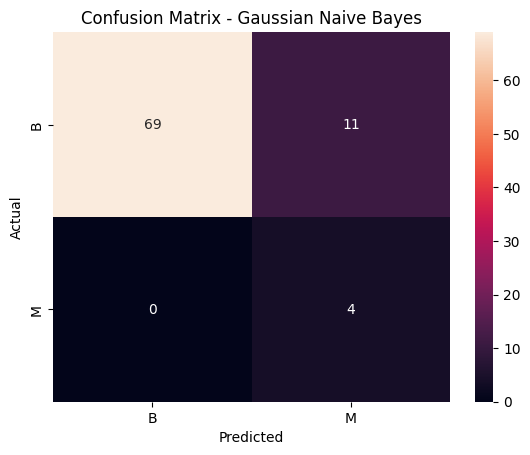

In [54]:
cm_gnb = confusion_matrix(y_test, y_pred_nb)
plt.figure()
sns.heatmap(cm_gnb, annot=True, xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()